In [73]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [74]:
from sklearn import datasets
iris = datasets.load_iris()

In [75]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [76]:
df = pd.read_csv('../iris/iris.csv')
df
        

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

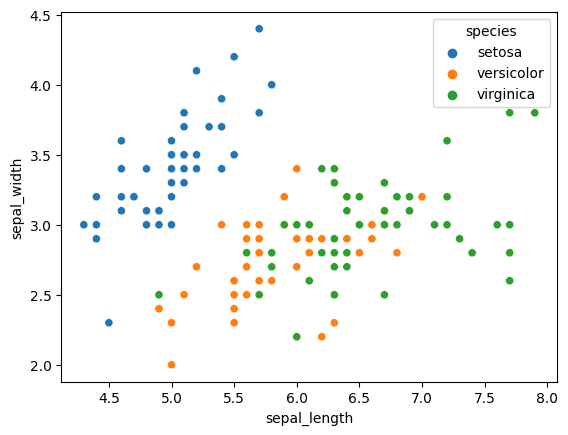

In [78]:
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'],hue=df['species'])

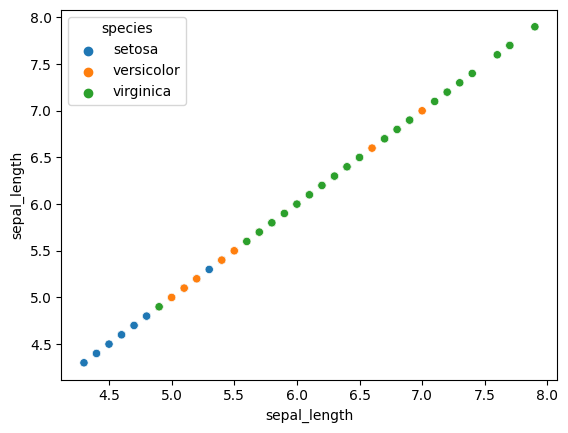

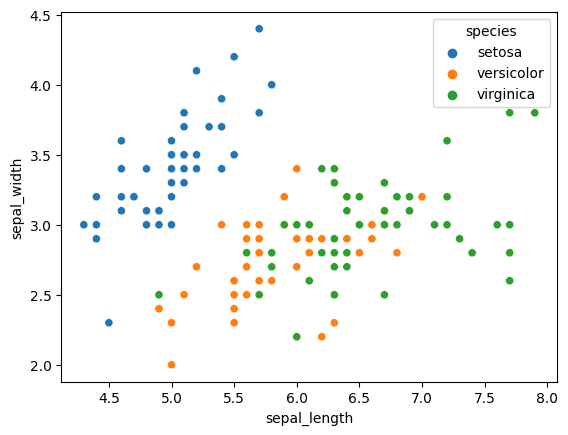

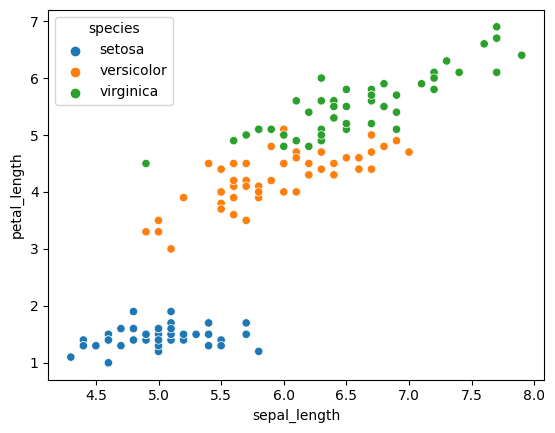

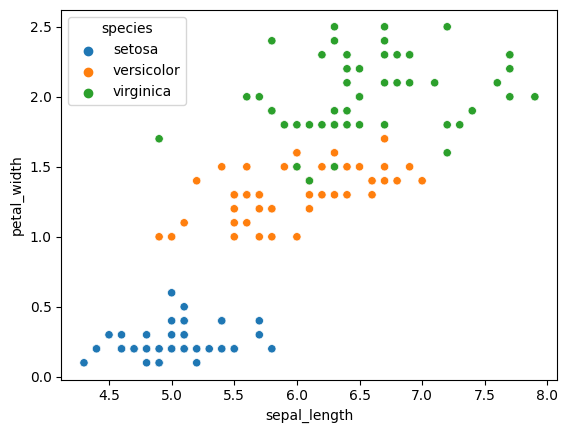

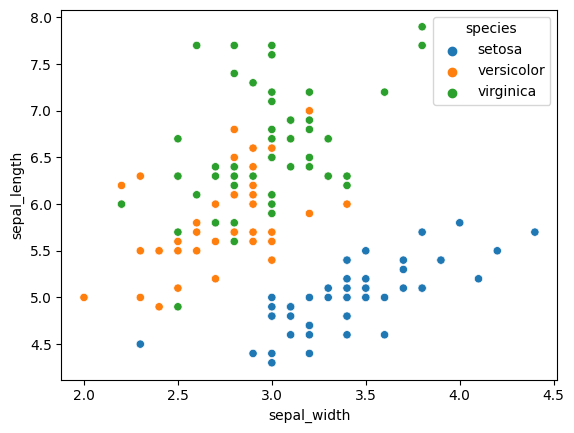

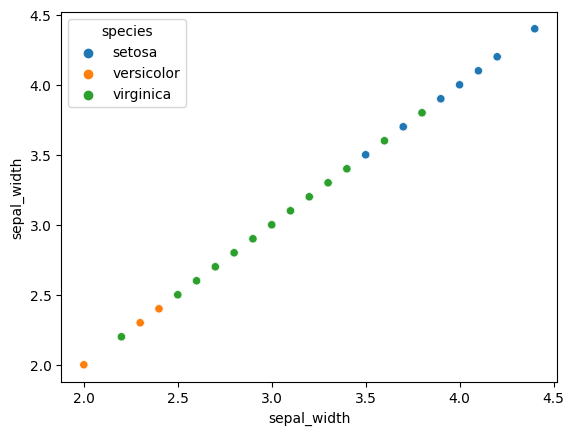

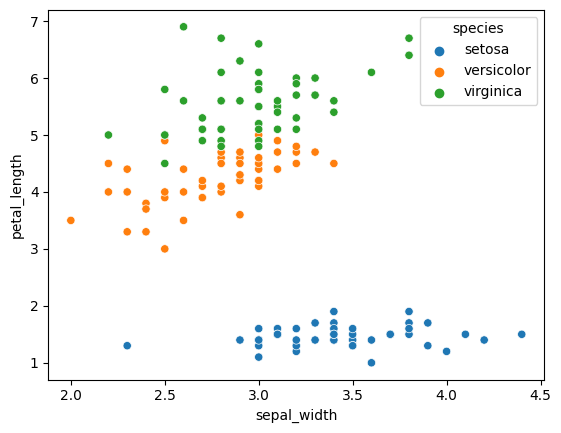

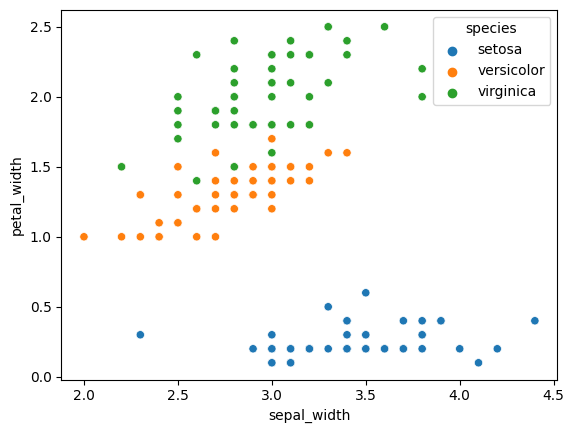

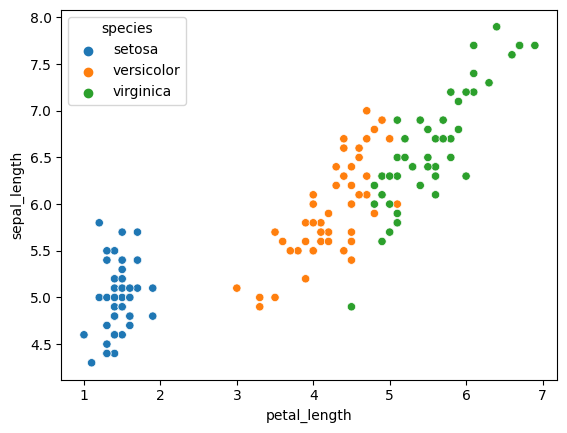

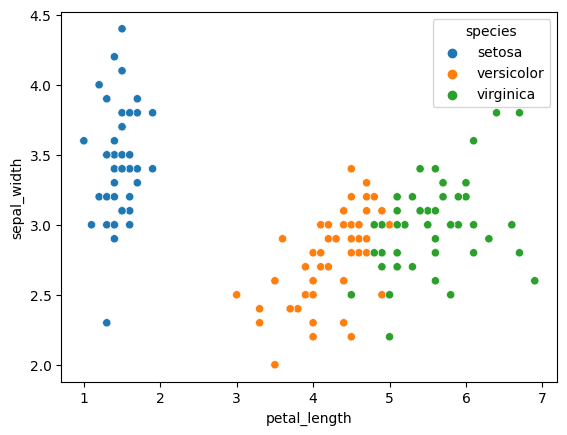

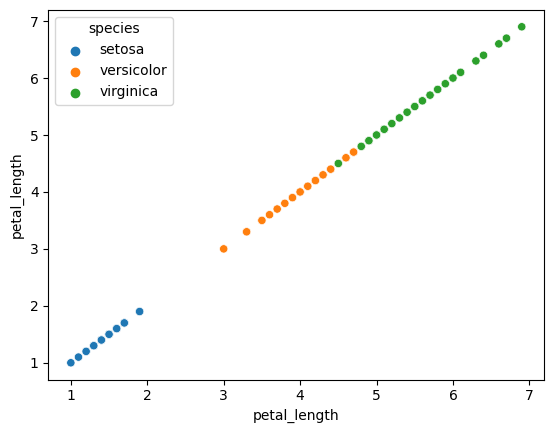

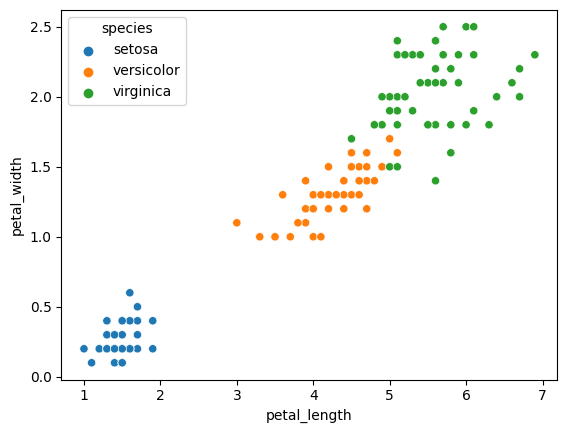

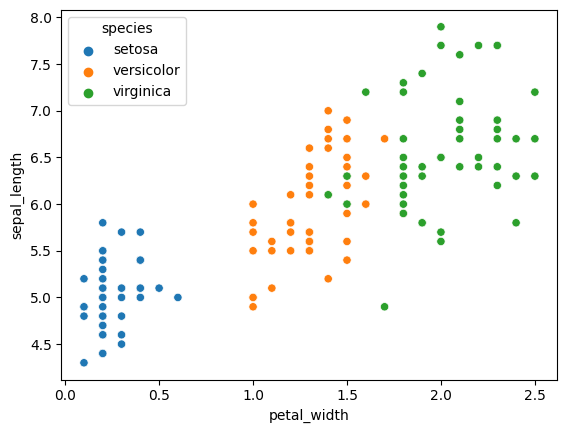

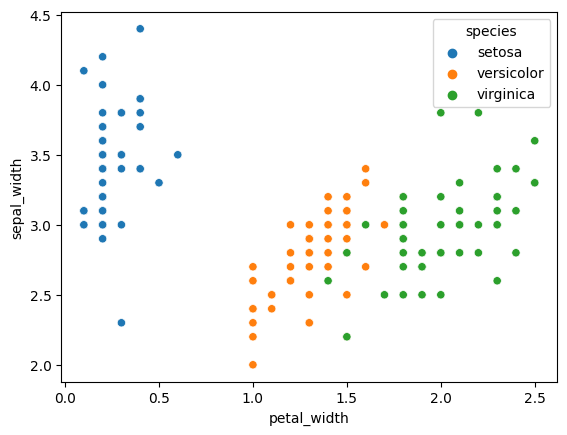

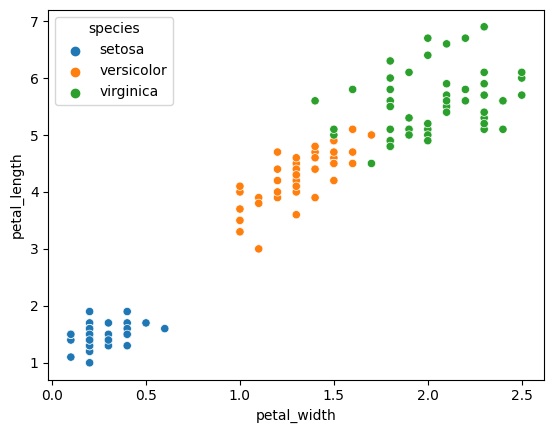

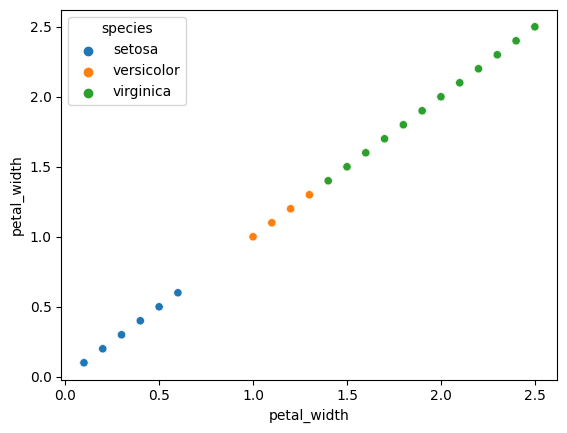

In [79]:
f = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in f:
    for j in f:
        sns.scatterplot(x=df[i],y=df[j],hue=df['species'])
        plt.show()

In [80]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [81]:
df = df.drop(['species'],axis='columns')
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [83]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

1 : 1.8646205767971828
2 : 1.0642507146657962
3 : 0.864104415693925
4 : 0.7837931737794794
5 : 0.6969941472657701
6 : 0.6665300748747086
7 : 0.6209828573723719
8 : 0.5776095166763285
9 : 0.5513896229736509


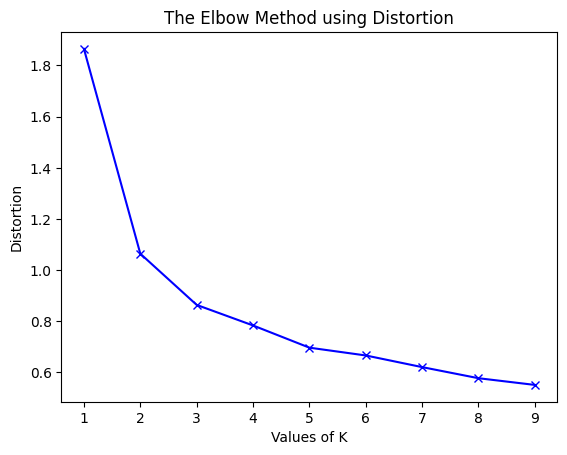

In [84]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Without scaling

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

In [86]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, kmeans.labels_)
silhouette_avg

0.550964374670744

With scaling

In [87]:
kmeans1 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
silhouette_avg = silhouette_score(X, kmeans.labels_)
silhouette_avg

0.44597964583308475

DBSCAN

In [88]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=5).fit(df)


In [89]:
silhouette_avg1 = silhouette_score(df, clustering.labels_)
silhouette_avg1

0.6863930543445406